In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_nodes = pd.read_csv("data/nodes.dat", delimiter = " ", header = None)
df_nodes.columns = ['nodeID', 'longitude', 'latitude']
df_nodes.head()

,nodeID,longitude,latitude
0,0,-121.904167,41.974556
1,1,-121.902153,41.974766
2,2,-121.896790,41.988075
3,3,-121.889603,41.998032
4,4,-121.886681,42.008739


In [6]:
df_edges = pd.read_csv("data/edges.dat", delimiter = " ", header = None)
df_edges.columns = ['edgeID', 'start node ID', 'end node ID', 'distance']
df_edges.head()

,edgeID,start node ID,end node ID,distance
0,0,0,1,0.002025
1,1,0,6,0.005952
2,2,1,2,0.014350
3,3,2,3,0.012279
4,4,3,4,0.011099


In [7]:
G = nx.Graph()

In [8]:
for i ,row in df_nodes.iterrows():
    G.add_node(int(row["nodeID"]), pos = (row["longitude"], row["latitude"]))

In [9]:
for i, row in df_edges.iterrows():
    G.add_edge(int(row["start node ID"]), int(row["end node ID"])) #

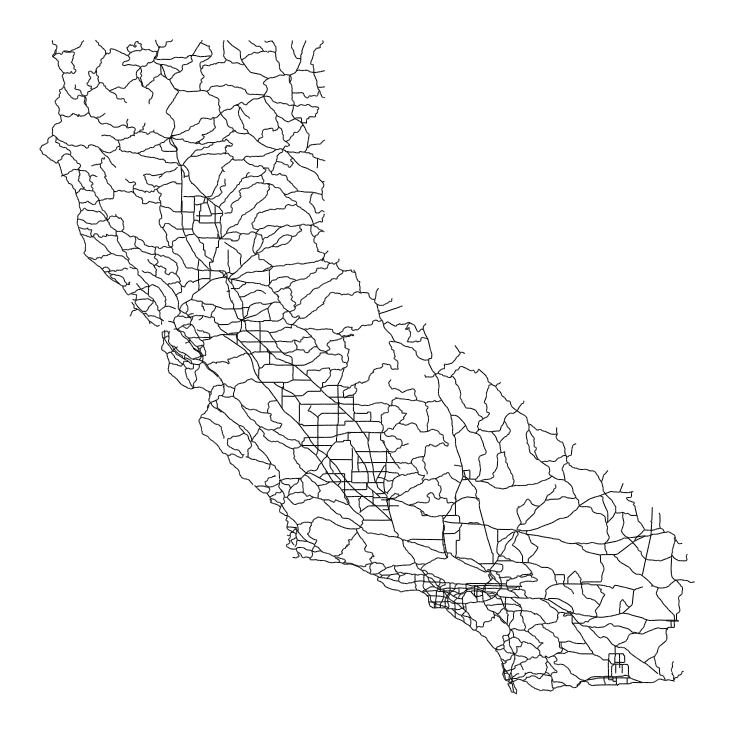

In [10]:
plt.figure(1, figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)


In [11]:
df_places = pd.read_csv("data/places.dat", delimiter = " ", header = None)
df_places.columns = ['name', 'longitude', 'latitude']

In [12]:
df_places.head()

,name,longitude,latitude
0,airport,-114.18639,34.30806
1,airport,-114.43083,34.52750
2,airport,-114.52667,33.86944
3,airport,-114.57528,34.18389
4,airport,-114.60194,34.81944


In [13]:
df_test = df_places.groupby(['name'])
df_test.size()

name
airport     995
arch         20
area        287
arroyo        2
bar         278
           ... 
trail      1187
tunnel      128
valley     7596
well        237
woods       197
Length: 63, dtype: int64

# Exploring the points of interest

In [14]:
G_places = nx.Graph()

In [15]:
for i ,row in df_places.iterrows():
    G_places.add_node(i, pos = (row["longitude"], row["latitude"]), name = row["name"])

In [16]:
color_map = []
nodes = nx.get_node_attributes(G_places, 'name')
for node in nodes.values():
    if node=='lake':
        color_map.append('blue')
    else: 
        color_map.append('red')

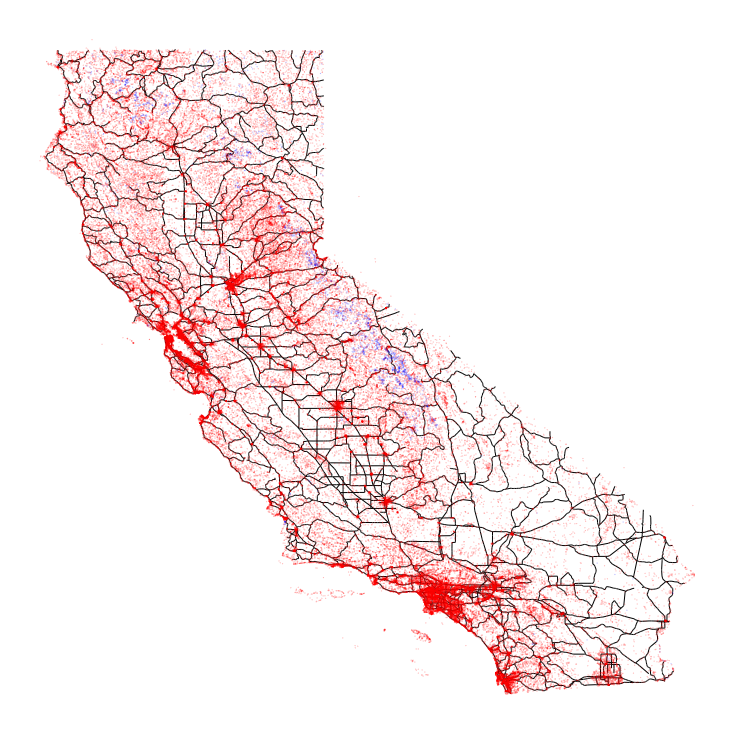

In [17]:
plt.figure(2, figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)
pos = nx.get_node_attributes(G_places, 'pos')
nx.draw(G_places, pos, node_size = 0.01, node_color=color_map)

# Merge points of interest with road network

In [18]:
'''
For each edge:
Start Node ID, End Node ID, Number of Points on This Edge, Edge Length.
    For each point on this edge:
    Category ID, Distance of This Point to the Start Node of This Edge 
'''

#f = open("data/mapformat.dat", "r")
# TBD somehow connect points of interest to the graph   

'\nFor each edge:\nStart Node ID, End Node ID, Number of Points on This Edge, Edge Length.\n    For each point on this edge:\n    Category ID, Distance of This Point to the Start Node of This Edge \n'

# pagerank

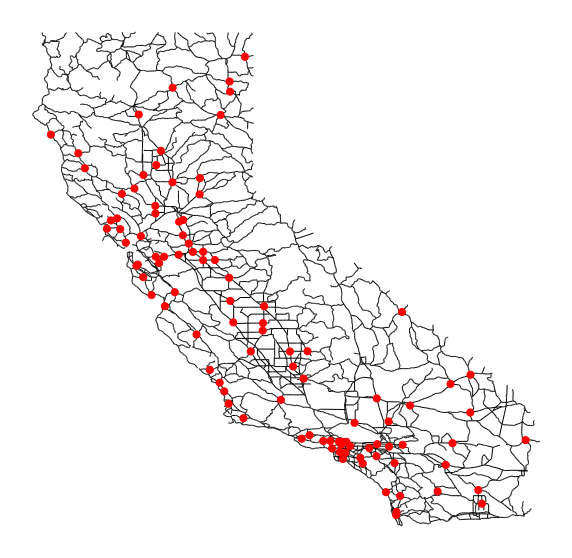

In [61]:
pageranks = nx.pagerank(G)
import operator
# get top n ranked nodes
n = 100
top = []
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
for i in range(n):
    top.append(sorted_pagerank[i][0])

topGraph = nx.subgraph(G,top)
pos = nx.get_node_attributes(topGraph, 'pos')
node_color = ['red' for v in topGraph]
node_size =  [50 for v in topGraph]

plt.figure(figsize=(10,10))
nx.draw_networkx(topGraph, pos, with_labels = False, node_color=node_color,node_size=node_size )
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)


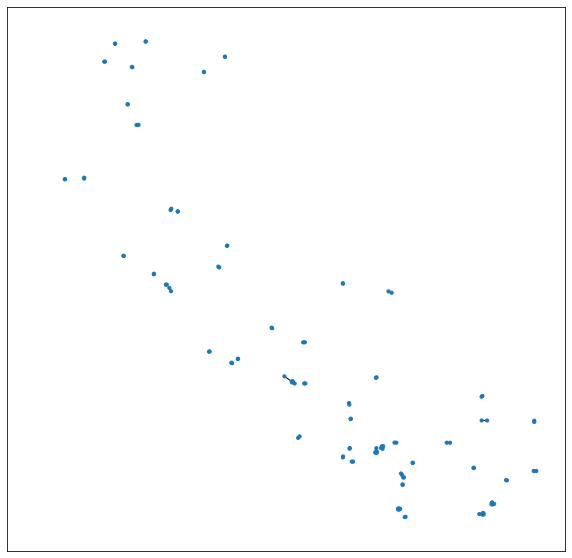

In [149]:
top = []
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
for i in range(1000):
    top.append(sorted_pagerank[i][0])

centralityGraph = nx.subgraph(G,top)
pos = nx.get_node_attributes(centralityGraph, 'pos')

#Centrality = nx.betweenness_centrality(centralityGraph)  #betweenness
#Centrality = nx.closeness_centrality(centralityGraph)     #closeness
Centrality = nx.degree_centrality(centralityGraph)       #degree


node_size =  [v * 10000 for v in Centrality.values()] 
plt.figure(figsize=(10,10))
nx.draw_networkx(centralityGraph, pos = pos, with_labels = False, node_size = node_size)

### might be useful later

In [21]:
nx.density(G)

9.793740121947844e-05

## Graph degrees

In [146]:
d = dict(nx.degree(G))

1183


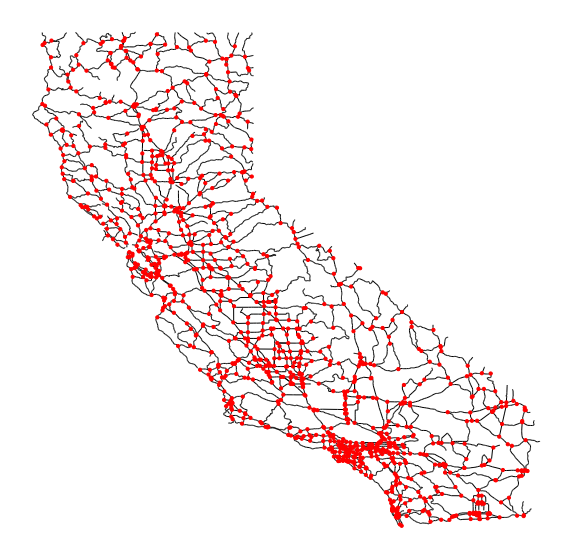

In [147]:
degrees = sorted(d.items(), key=operator.itemgetter(1),reverse = True)
nodes = []
for item in degrees:
    if(int(item[1]) > 2):
        nodes.append(item[0])

print(len(nodes))
subgraph = nx.subgraph(G, nodes)
pos = nx.get_node_attributes(subgraph, 'pos')
node_color = ['red' for v in subgraph]
node_size =  [10 for v in subgraph]

plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels = False, node_color=node_color,node_size=node_size )
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)



### create new graph based on degree values

In [91]:
paths = nx.all_shortest_paths(G,nodes,nodes)

In [116]:
newGraph = nx.Graph()

for node in nodes:
    newGraph.add_node(node)

In [117]:
from itertools import islice

for node in nodes:
    paths = dict(nx.single_source_shortest_path_length(G,node))
    shortestPaths = sorted(paths.items(), key=operator.itemgetter(1),reverse = False)
    shortestPathsToNode = {}

    degreeOfNode = d[node]

    for item in shortestPaths:
        if(int(item[0]) in nodes):
            shortestPathsToNode[int(item[0])] = int(item[1])

    truePaths = {}

    n_items = list(islice(shortestPathsToNode, degreeOfNode+1)) #exclude the node itself
    n_items.pop(0)
    for item in n_items:
        if(newGraph.has_edge(node, item)==False):
            newGraph.add_edge(node, item)



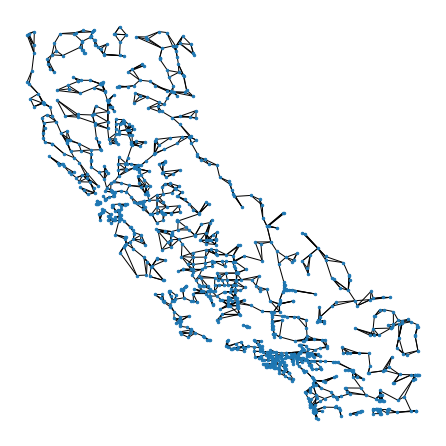

In [200]:
plt.figure(figsize=(6,6))
pos = nx.get_node_attributes(subgraph, 'pos')
nx.draw(newGraph, pos, node_size=6)

### try communities on the smaller graph

In [203]:
from networkx.algorithms import community
comp = community.girvan_newman(newGraph)

In [206]:
k = 2
for communities in itertools.islice(comp, k):
    continue 

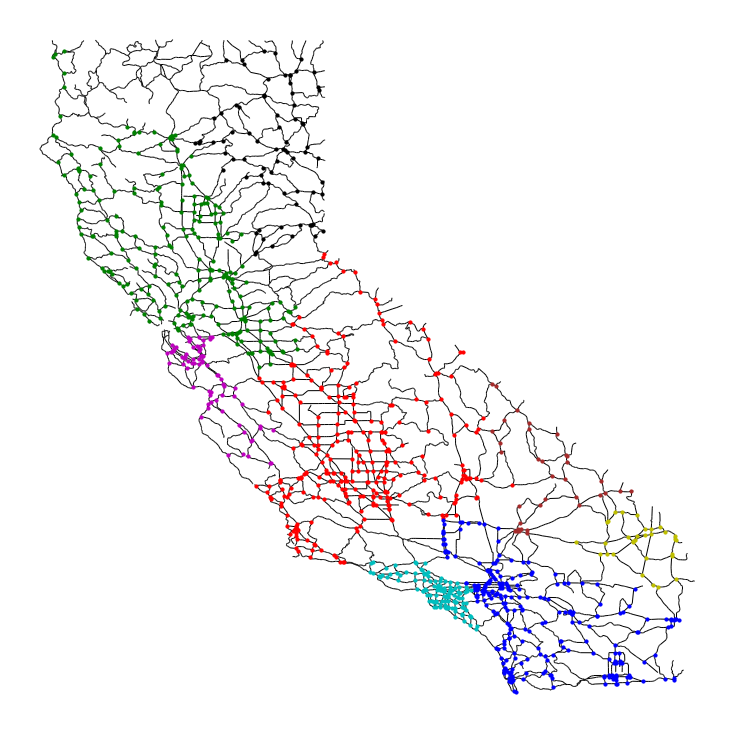

In [207]:
colorlist = ['r', 'g', 'b', 'k', 'm', 'brown', 'y', 'c']

plt.figure(figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)
for i in range(8):
    nx.draw_networkx_nodes(G, pos, nodelist = communities[i], node_color=colorlist[i], node_size = 10)
